data source:
https://www.kaggle.com/datasets/prachi13/customer-analytics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')

# Problem Statement
Sudah
menentukan problem apa yang akan
diselesaikan dengan model dari dataset yang dipilih

Dewasa ini transportasi menjadi salah satu faktor yang berperan penting dalam manajemen rantai pasok sebuah perusahaan.  tidak terkecuali sebuah perusahaan e-commerce juga perlu memfokuskan perhatian nya pada transportasi yang dimiliki. 

Aktivitas transportasi mengacu pada pergerakan produk dari satu lokasi ke lokasi lain dalam rantai pasokan. Kebutuhan akan pentingnya transportasi telah berkembang dengan meningkatnya globalisasi dalam rantai pasokan serta pertumbuhan e-commerce. (https://supplychainindonesia.com/transportasi-dalam-rantai-pasok-dan-logistik/)

Dengan adanya manajemen transportasi yang baik, sebuah perusahaan dapat meningkatkan efisiensi produksinya dengan melakukan kontroling terhadap ketepatan pengiriman dari supplier, disisi lain perusahaan juga dapat meningkatkan *customer satisfaction* dengan cara meningkatkan kontrol terhadap ketepatan pengiriman kepada konsumen.

Di Indonesia sendiri, pengiriman barang masih menjadi tantangan terbesar yang dihadapi oleh e-commerce, dimana sebanyak 36% konsumen menyatakan ketidakpuasan mereka terhadap pengalaman pengiriman e-commerce (https://supplychainindonesia.com/transportasi-dalam-rantai-pasok-dan-logistik/)

Data set yang kelompok kami jadikan acuan  memiliki target berupa ‘ketepatan pengiriman kepada konsumen’ dengan beberapa fitur-fitur pendukung yang mempengaruhi target tersebut.  diharapkan dengan menggunakan dataset ini, kami dapat membantu perusahaan e-commerce untuk dapat memprediksi adanya keterlambatan pengiriman kepada konsumen dimasa yang akan datang. Dengan adanya prediksi tersebut, diharapkan dapat membantu e-commerce untuk mengantisipasi keterlambatan pengiriman kepada konsumen, yang pada akhirnya akan meningkatkan *customer satisfaction* dan menekan tingkat *churn* dari konsumen.

# Data Exploration
Dataset
sudah di unduh dan di explore apa saja
attributes nya dan targetnya output olahan
datanya

In [3]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Berdasarkan pengamatan sekilas, data yang bersifat outlier kemungkinan berada pada Weight_in_gms dan Discount_offered dilihat dari perbedaan median dan Mean nya, serta nilai max terhadap Mean

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
cats = ['Mode_of_Shipment', 'Warehouse_block', 'Product_importance', 'Gender']
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

In [7]:
df[cats].describe()

,Mode_of_Shipment,Warehouse_block,Product_importance,Gender
count,10999,10999,10999,10999
unique,3,5,3,2
top,Ship,F,low,F
freq,7462,3666,5297,5545


In [8]:
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
9394,9395,C,Ship,3,1,193,10,high,F,1,4459,0
342,343,D,Ship,4,5,162,2,medium,M,64,1918,1
10182,10183,D,Ship,6,2,247,4,medium,M,3,1118,0
6600,6601,D,Ship,6,4,297,5,high,M,6,1631,0
7706,7707,A,Ship,5,3,232,5,medium,F,2,1057,1
7887,7888,B,Ship,4,3,137,3,medium,M,9,5016,0
2430,2431,D,Ship,3,5,113,2,low,F,19,1660,1
5969,5970,F,Ship,4,3,243,5,medium,F,3,1634,1
10739,10740,F,Ship,5,3,242,5,low,F,9,1716,0
10805,10806,F,Road,5,5,269,5,medium,F,3,1120,0


- Berdasarkan data shipping diatas, target atau hal yang coba diprediksi adalah kolom Reached.on.Time_Y.N, yaitu parameter yang menyatakan apakah suatu pengiriman (dengan segala fitur yang tercantum pada kolom sebelahnya) mencapai tujuan akhir dengan tepat waktu atau tidak


# Data Cleansing
Sudah
melakukan pengecekan data bermasalah
(missing values, invalid values, data duplicates), dan
sudah membersihkannya

In [9]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- Data-data pada tabel sesuai dengan tipe datanya

In [11]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

- Data-data pada tabel tidak memiliki nilai yang hilang

In [12]:
print(df.duplicated().sum()) #1
print(df.duplicated(subset=['ID','Warehouse_block','Mode_of_Shipment']).sum()) #2
print(df.duplicated(subset=['ID','Warehouse_block','Mode_of_Shipment', 'Customer_care_calls']).sum()) #3
print(df.duplicated(subset=['ID','Mode_of_Shipment','Weight_in_gms']).sum()) #4

0
0
0
0


In [13]:
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3691,3692,F,Road,3,5,272,2,low,M,3,5638,1
3118,3119,C,Ship,2,4,182,4,medium,M,1,3624,1
8286,8287,D,Ship,5,5,264,6,high,M,8,4644,1
5204,5205,A,Flight,5,2,248,3,medium,M,5,5946,0
988,989,C,Ship,3,1,223,3,medium,F,31,3942,1
7381,7382,F,Road,6,4,240,3,low,F,9,4986,1
7010,7011,A,Ship,3,3,249,3,low,M,10,5184,0
2099,2100,F,Ship,3,2,176,3,low,F,29,1953,1
5708,5709,A,Ship,3,2,174,3,low,M,3,4132,0
8775,8776,B,Flight,4,3,226,3,medium,M,10,5305,0


- Data-data pada tabel tidak memiliki pengulangan

# Feature Engineering
Sudah
menentukan feature apa saja yang akan
digunakan , feature apa yang perlu ditambahkan , dan
reformatting feature sesuai kebutuhan

- Fitur kategori, seperti Mode_of_Shipment, Warehouse_block, Product_importance & Gender dapat memengaruhi hasil prediksi karena unique value yang dimiliki oleh masing-masing kolom dapat dikatakan masih relatif rendah

- Fitur discount_offered dapat dikalikan dengan cost_of_the_Product dalam bentuk % sehingga  menghasilkan kolom baru yang berisi cost_after_discount

- Fitur numerikal yang perlu diolah lebih lanjut adalah Cost_of_the_Product & Weight_in_gms karena memiliki nilai yang relatif sangat besar dibanding kolom lainnya, sementara kolom ID tidak akan berpengaruh besar dalam proses pembelajaran karena nilainya berbeda pada tiap baris

In [14]:
df = pd.read_csv('Train.csv')
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3003,3004,B,Road,5,4,280,4,low,F,19,3298,1
5635,5636,F,Ship,3,2,268,3,low,M,9,4215,0
3387,3388,B,Ship,5,5,244,3,low,M,9,5695,0
4799,4800,F,Flight,7,2,250,5,medium,M,9,1327,0
5295,5296,B,Ship,3,4,169,3,low,F,4,5716,0
7940,7941,A,Road,4,2,233,7,medium,F,5,5361,0
3445,3446,F,Ship,3,1,252,2,low,M,4,5559,0
3379,3380,F,Ship,2,2,162,3,high,M,10,4489,1
1295,1296,F,Ship,5,3,185,3,low,M,25,2503,1
4429,4430,F,Ship,4,2,158,3,low,M,3,4527,0


In [15]:
df_disc_applied = df.copy()
df_disc_applied['Discount_offered'] = [1/100] * df['Discount_offered']
df_disc_applied['cashback'] = df['Cost_of_the_Product'] * df['Discount_offered']
df_disc_applied['cashback'] = [1/100] * df_disc_applied['cashback'] 
df_disc_applied['cost_after_discount'] = df['Cost_of_the_Product'] - df_disc_applied['cashback']
df_disc_applied

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
0,1,D,Flight,4,2,177,3,low,F,0.44,1233,1,77.88,99.12
1,2,F,Flight,4,5,216,2,low,M,0.59,3088,1,127.44,88.56
2,3,A,Flight,2,2,183,4,low,M,0.48,3374,1,87.84,95.16
3,4,B,Flight,3,3,176,4,medium,M,0.10,1177,1,17.60,158.40
4,5,C,Flight,2,2,184,3,medium,F,0.46,2484,1,84.64,99.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,0.01,1538,1,2.52,249.48
10995,10996,B,Ship,4,1,232,5,medium,F,0.06,1247,0,13.92,218.08
10996,10997,C,Ship,5,4,242,5,low,F,0.04,1155,0,9.68,232.32
10997,10998,F,Ship,5,2,223,6,medium,M,0.02,1210,0,4.46,218.54


In [16]:
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N', 'cashback', 'cost_after_discount']

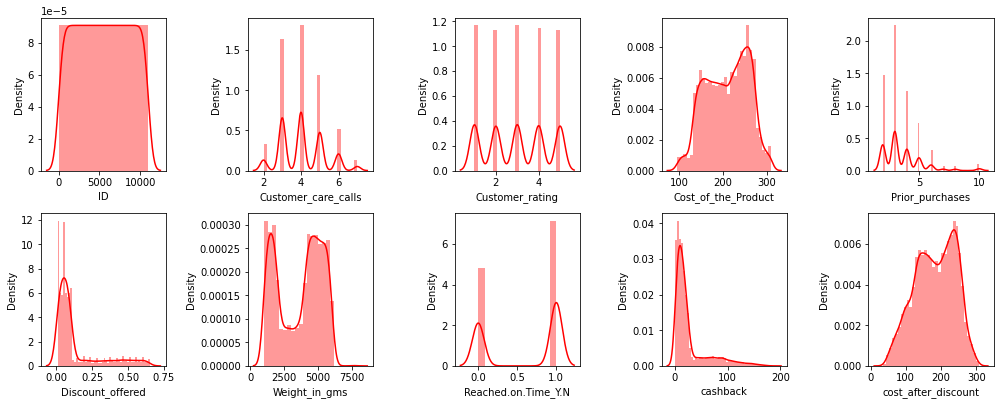

In [17]:
plt.figure(figsize=(14, 8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df_disc_applied[nums[i]], color='red')
    plt.tight_layout()

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_disc_applied['Cost_of_the_Product'] = MinMaxScaler().fit_transform(df_disc_applied['Cost_of_the_Product'].values.reshape(len(df_disc_applied), 1))
df_disc_applied['Weight_in_gms'] = MinMaxScaler().fit_transform(df_disc_applied['Weight_in_gms'].values.reshape(len(df_disc_applied), 1))
df_disc_applied['cashback'] = MinMaxScaler().fit_transform(df_disc_applied['cashback'].values.reshape(len(df_disc_applied), 1))
df_disc_applied['cost_after_discount'] = MinMaxScaler().fit_transform(df_disc_applied['cost_after_discount'].values.reshape(len(df_disc_applied), 1))

In [19]:
df_disc_applied.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,0.533630,3.567597,0.133732,0.384663,0.596691,0.140980,0.542176
std,3175.28214,1.141490,1.413603,0.224595,1.522860,0.162055,0.238916,0.490584,0.178435,0.210557
min,1.00000,2.000000,1.000000,0.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,2750.50000,3.000000,2.000000,0.341121,3.000000,0.040000,0.122498,0.000000,0.036336,0.383024
50%,5500.00000,4.000000,3.000000,0.551402,3.000000,0.070000,0.459898,1.000000,0.072780,0.553558
75%,8249.50000,5.000000,4.000000,0.724299,4.000000,0.100000,0.591527,1.000000,0.131124,0.720206
max,10999.00000,7.000000,5.000000,1.000000,10.000000,0.650000,1.000000,1.000000,1.000000,1.000000
